<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 7. <b>Дерево решений и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [42]:
surname = "Oops" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 15 + 1
print("Ваш вариант - ", variant)

import itertools
comb = list(itertools.combinations(range(1, 7), 2))
print("Задача №", comb[variant-1][0])
print("Задача №", comb[variant-1][1])

Ваш вариант -  11
Задача № 3
Задача № 5


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<ol>
    <li>Загрузить исходные данные</li>
    <li>Отобразить исходные данные</li>
    <li>Разделить исходные данные на обучающее (train_init) и тестовое подмножества (test) - см. ДЗ 5-6</li>
    <li>Разделить обучающее подмножество (train_init) на 4 folds - см. ДЗ 5-6</li>
    <li>Выбрать модель: построить график MSE/Accuracy-Max_depth, выбрать наилучшую модель</li>
    <li>Повторить обучение лучшей модели на train_init</li>
    <li>Проверить на тестовом подмножестве</li>
    <li>Построить итоговые графики регрессии/классификации для train_init и test</li>
</ol>

<p><span style="color:green; font-weight:bold">ПРИМЕЧАНИЕ!</span> Везде random_state=0</p>

<p><b>Задача 1.</b> Регрессия и Decision Tree - набор <b><i>"Reg_A5.csv"</i></b></p>

In [43]:
# DecisionTreeRegressor(criterion="mse", max_depth=i, random_state=0)

<p><b>Задача 2.</b> Регрессия и Random Forest - набор <b><i>"Reg_A5.csv"</i></b></p>

In [44]:
# RandomForestRegressor(n_estimators=50, max_depth=i, criterion="mse", bootstrap=True,
#                                     oob_score=False, random_state=0)

<p><b>Задача 3.</b> Классификация и Decision Tree - набор <b><i>"Cl_A5_V1.csv"</i></b></p>

In [45]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error

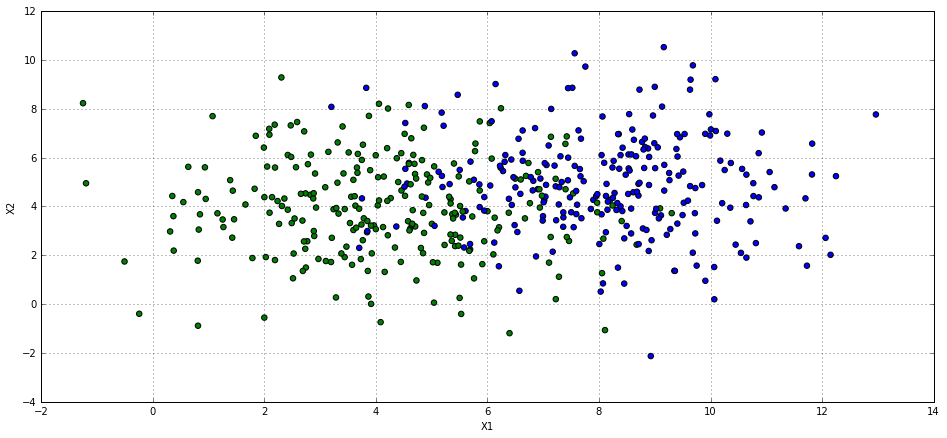

In [46]:
# Загружаем и отображаем исходные данные
cl_file = pnd.read_csv("Cl_A5_V1.csv")

plt.figure(1, figsize=[16, 7])
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(cl_file.X1, cl_file.X2, c=cl_file.Y, s=30, cmap=clrMap)
plt.grid(True)
plt.show()

In [47]:
# Делим тестовое и тренировочной множества, последнее делим с помощью KFolds
x = list(zip(cl_file.X1, cl_file.X2))
y = cl_file.Y.values

x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train_init, x_test, y_train_init, y_test = np.array(x_train_init), np.array(x_test), np.array(y_train_init), np.array(y_test)
kf = cross_validation.KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

In [48]:
# Получаем данные для сравнения
depth = range(1, 30)
trainList = []
valList = []

for i in depth:
    trainDep = []
    valDep = []
    for train, val in kf:
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)
        dtc = dtc.fit(x_train_init[train], y_train_init[train])
        trainDep.append(dtc.score(x_train_init[train], y_train_init[train]))
        valDep.append(dtc.score(x_train_init[val], y_train_init[val]))
    trainList.append(np.mean(trainDep))
    valList.append(np.mean(valDep))  

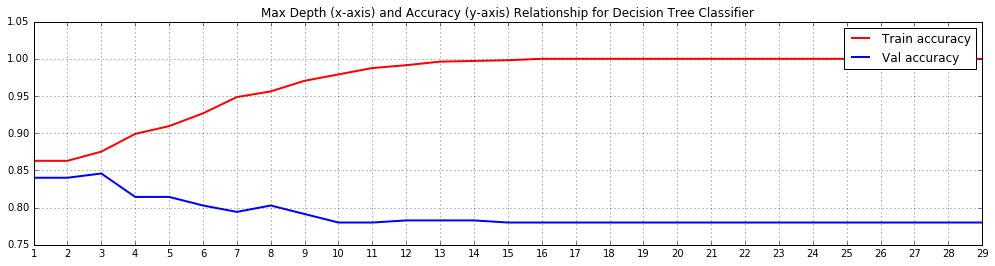

In [49]:
# Визуализируем
def plot_deg_train_val(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["Train accuracy", "Val accuracy"])
    plt.grid(True)
    plt.show()

plot_deg_train_val("Max Depth (x-axis) and Accuracy (y-axis) Relationship for Decision Tree Classifier", 
                   depth, trainList, valList)

In [50]:
# Выберем параметр max_depth = 3; обучим нашу модель и проверим accuracy на тестовом подмножестве
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dtc = dtc.fit(x_train_init, y_train_init)
dtc.score(x_test, y_test)

0.84666666666666668

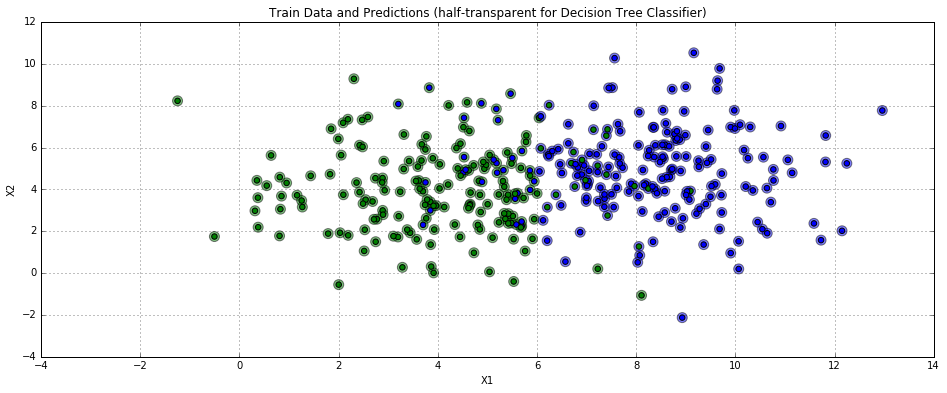

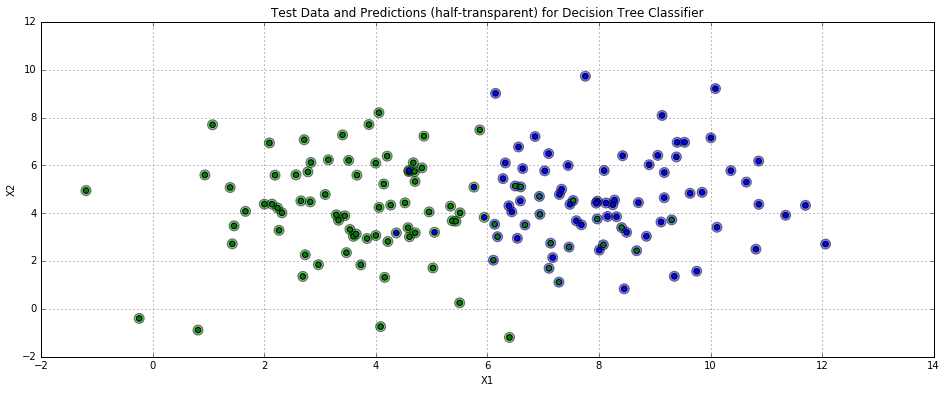

In [51]:
# Результаты классификации для train_init и test
def plot_classification(name, x, y):
    x1 = [i[0] for i in x]
    x2 = [i[1] for i in x]
    
    plt.figure(1, figsize=[16, 6])
    plt.title(name)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x1, x2, c=dtc.predict(x), s=100, cmap=clrMap, alpha=0.5)
    plt.scatter(x1, x2, c=y, s=30, cmap=clrMap)
    plt.grid(True)
    plt.show()

plot_classification("Train Data and Predictions (half-transparent for Decision Tree Classifier)", x_train_init, y_train_init)
plot_classification("Test Data and Predictions (half-transparent) for Decision Tree Classifier", x_test, y_test)

In [52]:
# DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)

<p><b>Задача 4.</b> Классификация и Decision Tree - набор <b><i>"Cl_A5_V2.csv"</i></b></p>

In [53]:
# DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)

<p><b>Задача 5.</b> Классификация и Random Forest - набор <b><i>"Cl_A5_V1.csv"</i></b></p>

In [54]:
# Так как шаги 1-4 было выполнены в ходе выполнения предыдущего задания, выполнять повторно их не будем

# Получаем данные для сравнения

depth = range(1, 30)
trainList = []
valList = []

for i in depth:
    trainDep = []
    valDep = []
    for train, val in kf:
        rfc = RandomForestClassifier(n_estimators=50, max_depth=i, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
        rfc = rfc.fit(x_train_init[train], y_train_init[train])
        trainDep.append(rfc.score(x_train_init[train], y_train_init[train]))
        valDep.append(rfc.score(x_train_init[val], y_train_init[val]))
    trainList.append(np.mean(trainDep))
    valList.append(np.mean(valDep))  

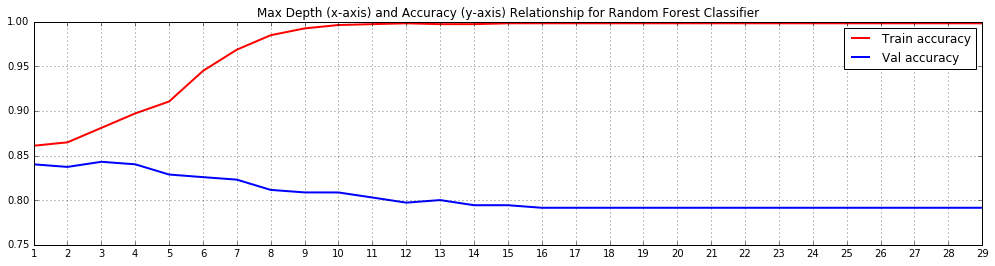

In [55]:
plot_deg_train_val("Max Depth (x-axis) and Accuracy (y-axis) Relationship for Random Forest Classifier",
                   depth, trainList, valList)

In [56]:
# Выберем параметр max_depth = 3; обучим нашу модель и проверим accuracy на тестовом подмножестве
rtc = RandomForestClassifier(n_estimators=50, max_depth=3, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
rfc = rfc.fit(x_train_init, y_train_init)
rfc.score(x_test, y_test)

0.83999999999999997

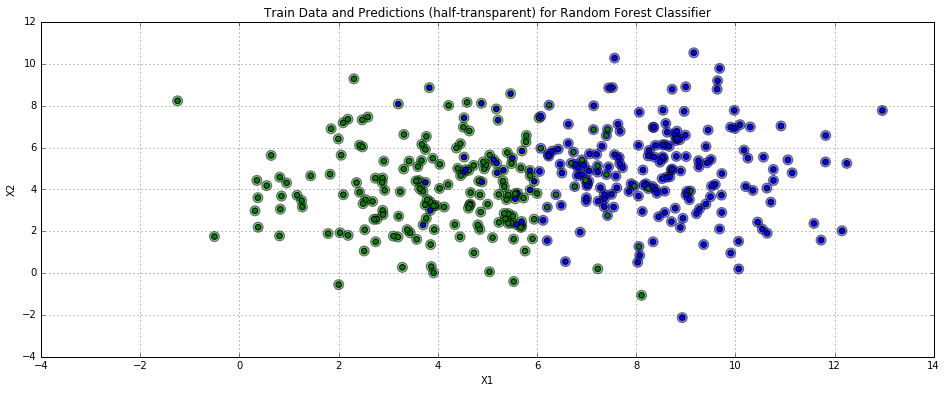

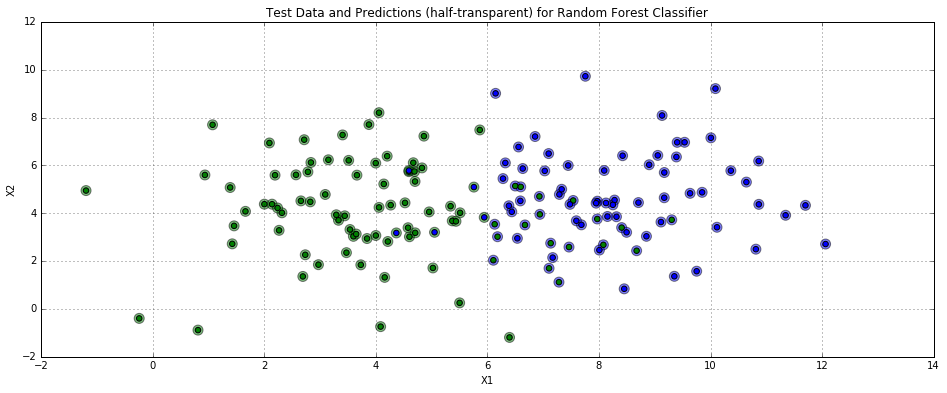

In [57]:
# Результаты классификации для train_init и test
plot_classification("Train Data and Predictions (half-transparent) for Random Forest Classifier", x_train_init, y_train_init)
plot_classification("Test Data and Predictions (half-transparent) for Random Forest Classifier", x_test, y_test)

<p><b>Задача 6.</b> Классификация и Random Forest - набор <b><i>"Cl_A5_V2.csv"</i></b></p>

In [59]:
# RandomForestClassifier(n_estimators=50, max_depth=i, criterion="entropy", bootstrap=True, 
#                                     oob_score=False, random_state=0)